# Part 2: Scenario comparison

We first import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

We create the SIRD model from the practical.

In [2]:
def sird_model(y, t, beta, gamma, mu):
    """
    SIRD model with death compartment

    TODO: Adapt the SIR model to include deaths

    Additional parameter:
    - mu: mortality rate

    New compartment:
    - D: Deaths
    """
    S, I, R, D = y  
    N = S + I + R + D

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

We create the function from part 1:

In [3]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    # Your implementation here
    # Test values for gamma
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    results = []

    # Time points
    t = np.linspace(0, simulation_days, simulation_days)
    plt.figure(figsize=(10, 6))

    for gamma in gamma_values:
        # Initial conditions
        S0 = N - I0
        R0 = 0
        D0 = 0
        y0 = [S0, I0, R0, D0]

        # Solve SIRD model
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S, I, R, D = sol.T

        # Calculate metrics
        peak_infected = np.max(I)
        peak_day = np.argmax(I)
        total_deaths = D[-1]
        R0_value = beta / gamma

        results.append({
            "gamma": gamma,
            "R0": round(R0_value, 2),
            "peak_infected": int(peak_infected),
            "peak_day": int(peak_day),
            "total_deaths": int(total_deaths)
        })

        plt.plot(t, I, label=f"γ={gamma}, R₀={R0_value:.2f}")
    
    plt.xlabel("Days")
    plt.ylabel("Infectious individuals")
    plt.title(f"Epidemic Curves for Different Recovery Rates (β={beta}, μ={mu})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    return pd.DataFrame(results)

### 2.1 Scenario analysis 

We then test both scenarios.

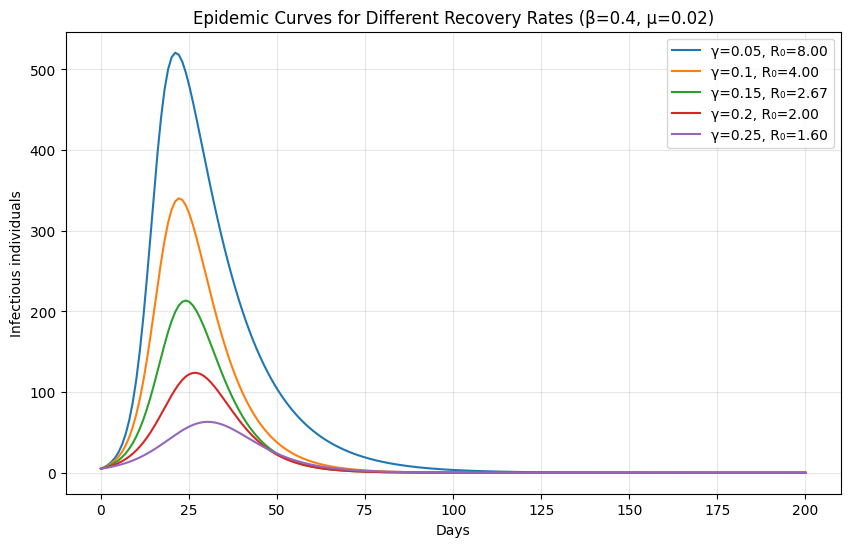

   gamma    R0  peak_infected  peak_day  total_deaths
0   0.05  8.00            520        21           284
1   0.10  4.00            340        22           159
2   0.15  2.67            213        24           102
3   0.20  2.00            123        27            67
4   0.25  1.60             63        30            42


In [4]:
# Scenario A - "High Transmission"
df_scenario_1 = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)

print(df_scenario_1)

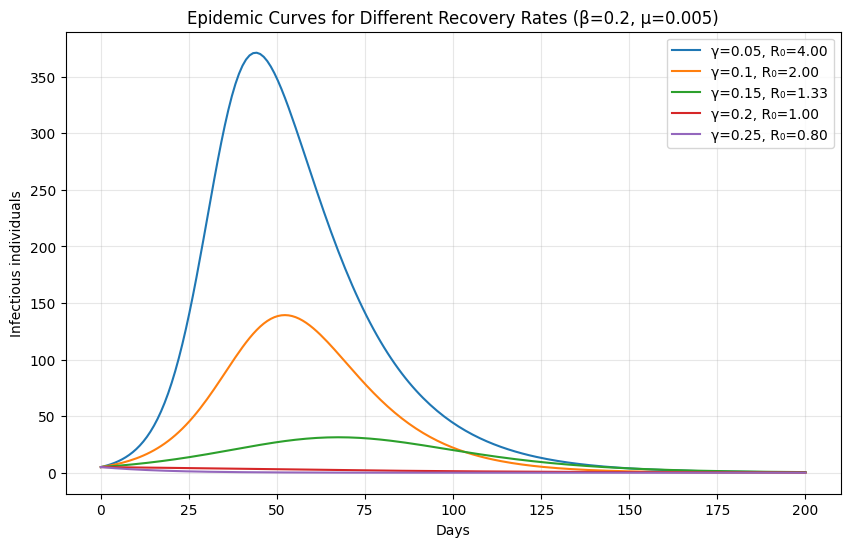

   gamma    R0  peak_infected  peak_day  total_deaths
0   0.05  4.00            371        44            88
1   0.10  2.00            139        52            36
2   0.15  1.33             31        67            13
3   0.20  1.00              5         0             1
4   0.25  0.80              5         0             0


In [5]:
# Scenario B - "Low Transmission"
df_scenario_2 = analyze_recovery_rates(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)

print(df_scenario_2)

We then compare the different parts of the result based on the recovery value ($\gamma$) for each scenario.
To do this, we first add a "scenario" column and concatenate both DataFrames. This will make plotting much easier using seaborn's barplot function.

In [12]:
df_scenario_1["scenario"] = "High Transmission" 
df_scenario_2["scenario"] = "Low Transmission"

In [13]:
df_both_scenarios = pd.concat([df_scenario_1, df_scenario_2])
df_both_scenarios

,gamma,R0,peak_infected,peak_day,total_deaths,scenario
0,0.05,8.00,520,21,284,High Transmission
1,0.10,4.00,340,22,159,High Transmission
2,0.15,2.67,213,24,102,High Transmission
3,0.20,2.00,123,27,67,High Transmission
4,0.25,1.60,63,30,42,High Transmission
0,0.05,4.00,371,44,88,Low Transmission
1,0.10,2.00,139,52,36,Low Transmission
2,0.15,1.33,31,67,13,Low Transmission
3,0.20,1.00,5,0,1,Low Transmission
4,0.25,0.80,5,0,0,Low Transmission


We can then inspect each individual parameter.

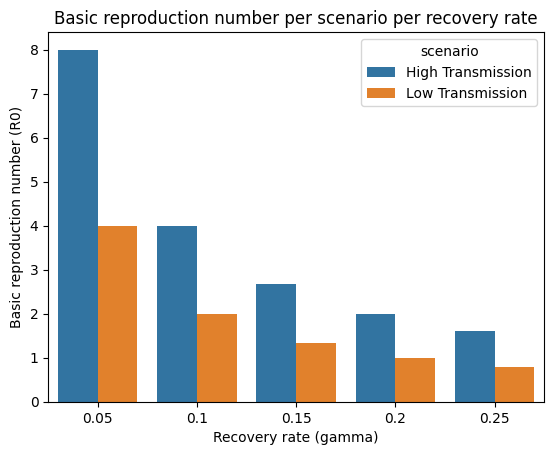

In [14]:
sns.barplot(x=df_both_scenarios["gamma"], y=df_both_scenarios["R0"], hue=df_both_scenarios["scenario"])
plt.title("Basic reproduction number per scenario per recovery rate")
plt.ylabel("Basic reproduction number (R0)")
plt.xlabel("Recovery rate (gamma)")
plt.show()

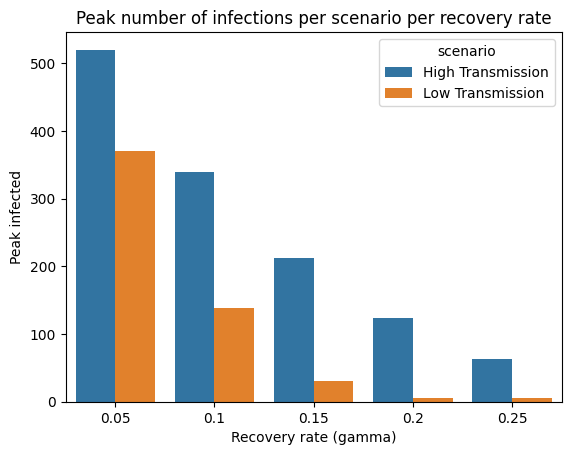

In [15]:
sns.barplot(x=df_both_scenarios["gamma"], y=df_both_scenarios["peak_infected"], hue=df_both_scenarios["scenario"])
plt.title("Peak number of infections per scenario per recovery rate")
plt.ylabel("Peak infected")
plt.xlabel("Recovery rate (gamma)")
plt.show()

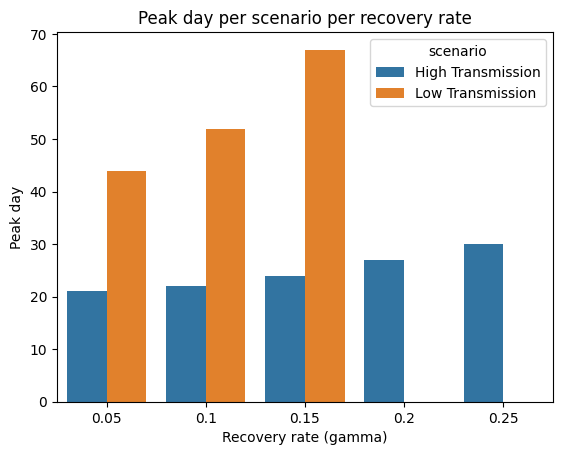

In [16]:
sns.barplot(x=df_both_scenarios["gamma"], y=df_both_scenarios["peak_day"], hue=df_both_scenarios["scenario"])
plt.title("Peak day per scenario per recovery rate")
plt.ylabel("Peak day")
plt.xlabel("Recovery rate (gamma)")
plt.show()

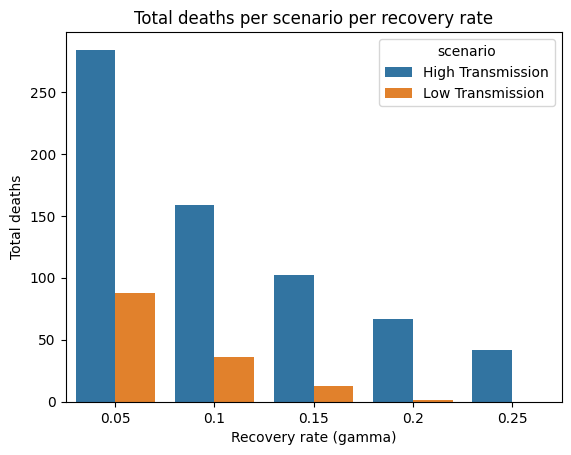

In [17]:
sns.barplot(x=df_both_scenarios["gamma"], y=df_both_scenarios["total_deaths"], hue=df_both_scenarios["scenario"])
plt.title("Total deaths per scenario per recovery rate")
plt.ylabel("Total deaths")
plt.xlabel("Recovery rate (gamma)")
plt.show()

###Interpretation

It appears that a disease with a higher transmission is much more dangerous for public health. 
First, at its peak, it usually has a much higher reproduction number than the lower transmission disease. This difference is seen as even more pronounced in lower recovery rate cases. This is significant as the disease thus spreads faster. This is made evident by the fact that the peak amount of infected individuals is usually much higher, with this peak being reached usually earlier. On higher recovery rates, the lower transmission disease begins directly in a state of decline. This is not the case for the high transmission disease, although higher recovery rates will lead to the peak being reached later in the disease's lifespan. 
The higher transmission disease also causes a significantly larger amount of deaths, which can (no doubt) be considered a very negative factor for public health.
The only factor that plays more into the lower transmission disease's favor is that it sticks around for longer, while the high transmission disease may quickly exhaust the part of the population that is susceptible to it.
